In [1]:
import librosa
import librosa.display
import os
import pandas as pd
import numpy as np
from time import time 
import random as rd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import threading
from sklearn.metrics import confusion_matrix,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

path_to_db_voice = "C:\\Users\\antoi\Desktop\\Airbus\\projet_AIRBUS\\db\\voice\\"
path_to_db_plane = "C:\\Users\\antoi\Desktop\\Airbus\\projet_AIRBUS\\db\\plane\\"
path_to_db_both = "C:\\Users\\antoi\Desktop\\Airbus\\projet_AIRBUS\\db\\both\\"

l_voice_records = os.listdir(path_to_db_voice)
l_airplane_records = os.listdir(path_to_db_plane)
l_both_records = os.listdir(path_to_db_both)

In [2]:
def separe_train_test(db_folder_path,n_records,test_size):
    l_records = os.listdir(db_folder_path)
    sub_l_records = rd.sample(l_records,n_records)
    size = len(sub_l_records)
    sep = round(test_size*size)
    sample = rd.sample(sub_l_records,size)
    test = sample[:sep]
    train = sample[sep:]
    return train,test

In [3]:
def gen_X_train_test(db_folder_path,n_records,test_size):
    sp_rec_train = []
    sp_rec_test = []
    hops_train = []
    hops_test = []
    records_train,records_test = separe_train_test(db_folder_path,n_records,test_size)
    i = 0
    for record in records_train:
        print('Building train {}/{}'.format(i,len(records_train)),end='\r')
        signal,sample_rate = librosa.load(db_folder_path + record)
        spectrum = librosa.stft(y=signal,center=False) 
        spectrum = spectrum.astype(float)
        sp_rec_train.append(np.abs(np.transpose(spectrum)))
        hops_train.append(len(signal)//len(spectrum))
        i+=1

        # plt.hist(np.unique(spectrum),bins=200)
        # plt.yscale('log')
        # fig = librosa.display.specshow(spectrum, sr=sample_rate, x_axis='time', y_axis='log')
        # plt.colorbar(format='%+2.0f dB')
        # plt.title('Spectrogram')
        # plt.plot()
        # plt.show()
    i=0
    for record in records_test: 
        print('Building  test {}/{}'.format(i,len(records_test)),end='\r')
        signal,sample_rate = librosa.load(db_folder_path + record)
        spectrum = librosa.stft(y=signal,center=False) 
        spectrum = spectrum.astype(float)
        sp_rec_test.append(np.abs(np.transpose(spectrum)))
        hops_test.append(len(signal)//len(spectrum))
        i+=1

    X_train = np.concatenate(sp_rec_train)
    X_test = np.concatenate(sp_rec_test)

    return X_train,X_test,hops_train,hops_test

In [4]:



n_records = 178

X_voice_train,X_voice_test,hops_voice_train,hops_voice_test= gen_X_train_test(path_to_db_voice,n_records,0.3)
print('Voice done',end='\r')
X_plane_train,X_plane_test,hops_plane_train,hops_plane_test = gen_X_train_test(path_to_db_plane,n_records,0.3)
print('Plane done',end='\r')
X_both_train,X_both_test,hops_both_train,hops_both_test = gen_X_train_test(path_to_db_both,n_records,0.3)
print('Both done',end='\r')

In [5]:
hops_voice_train

[279,
 157,
 222,
 346,
 278,
 262,
 241,
 304,
 323,
 331,
 324,
 142,
 330,
 340,
 319,
 305,
 331,
 306,
 267,
 344,
 313,
 243,
 58,
 217,
 333,
 317,
 346,
 286,
 315,
 189,
 270,
 333,
 308,
 281,
 339,
 312,
 319,
 329,
 333,
 292,
 313,
 162,
 342,
 260,
 262,
 336,
 325,
 302,
 256,
 134,
 295,
 297,
 59,
 292,
 251,
 85,
 316,
 300,
 280,
 299,
 313,
 201,
 126,
 58,
 324,
 334,
 277,
 247,
 143,
 309,
 331,
 317,
 113,
 332,
 342,
 324,
 307,
 275,
 136,
 311,
 297,
 303,
 315,
 170,
 232,
 334,
 277,
 330,
 129,
 150,
 339,
 263,
 97,
 289,
 223,
 148,
 320,
 327,
 212,
 321,
 310,
 133,
 326,
 322,
 297,
 338,
 43,
 230,
 328,
 122,
 321,
 210,
 338,
 327,
 327,
 297,
 312,
 250,
 194,
 327,
 316,
 314,
 276,
 303,
 339]

In [6]:
print(len(X_voice_train) + len(X_plane_train) + len(X_both_train))
print(len(X_plane_train[0]))

202433
1025


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

threshold = 10


import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

y_voice_train = ['Voice' for elt in X_voice_train]
y_plane_train = ['Plane' for elt in X_plane_train]
y_both_train = ['Voice' for elt in X_both_train]

y_voice_test = ['Voice' for elt in X_voice_test]
y_plane_test = ['Plane' for elt in X_plane_test]
y_both_test = ['Voice' for elt in X_both_test]


Y = y_voice_train + y_plane_train + y_both_train + y_plane_test + y_both_test
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train = np.concatenate([X_voice_train,X_plane_train,X_both_train])
X_test = np.concatenate([X_plane_test,X_both_test])

y_train = dummy_y[:len(y_voice_train) + len(y_plane_train) + len(y_both_train)]
y_test = dummy_y[len(y_voice_train) + len(y_plane_train) + len(y_both_train)::]




y_train[0].shape



(2,)

In [21]:
print(y_test)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [66]:
len(y_test)

56221

In [51]:
for k in y_train:
    if k.shape != (2,):
        print(k)


In [21]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [22]:
def model():
    model = Sequential()
    model.add(Dense(1025, activation='relu'))
    model.add(Dense(512, input_dim=1025, activation = 'sigmoid'))
    model.add(Dropout(0.3))
    model.add(Dense(150, input_dim=512, activation = 'sigmoid'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [23]:
model = model()
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.3084 - accuracy: 0.8508
Epoch 2/100
3164/3164 [==============================] - 29s 9ms/step - loss: 0.2694 - accuracy: 0.8732
Epoch 3/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.2556 - accuracy: 0.8801
Epoch 4/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.2455 - accuracy: 0.8862
Epoch 5/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.2378 - accuracy: 0.8902
Epoch 6/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.2313 - accuracy: 0.8938
Epoch 7/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.2252 - accuracy: 0.8970
Epoch 8/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.2196 - accuracy: 0.8998
Epoch 9/100
3164/3164 [==============================] - 29s 9ms/step - loss: 0.2139 - accuracy: 0.9027
Epoch 10/100
3164/3164 [==============================] - 29s 9m

3164/3164 [==============================] - 30s 9ms/step - loss: 0.0906 - accuracy: 0.9551
Epoch 80/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.0899 - accuracy: 0.9553
Epoch 81/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.0894 - accuracy: 0.9555
Epoch 82/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.0894 - accuracy: 0.9561
Epoch 83/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.0888 - accuracy: 0.9560
Epoch 84/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.0897 - accuracy: 0.9555
Epoch 85/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.0879 - accuracy: 0.9558
Epoch 86/100
3164/3164 [==============================] - 30s 10ms/step - loss: 0.0872 - accuracy: 0.9566
Epoch 87/100
3164/3164 [==============================] - 30s 9ms/step - loss: 0.0871 - accuracy: 0.9569
Epoch 88/100
3164/3164 [==============================] - 30s 9ms/s

In [24]:
y_pred = model.predict(X_test)
y_pred_aux = []
for k in y_pred:
    if k[0]>k[1]:
        y_pred_aux.append([1,0])
    else:
        y_pred_aux.append([0,1])

1741/1741 [==============================] - 4s 3ms/step


In [25]:
y_pred[0],y_test[0]

(array([0.1759036, 0.8240964], dtype=float32), array([1., 0.], dtype=float32))

In [26]:
bonnePredV = [] #liste des proba prédites pour la voix quand le modèle à raison
bonnePredP = []
mauvaisePredV = [] #liste des proba prédites pour la voix quand le modèle à tord
mauvaisePredP = []


for i in range(len(y_pred)):
    probav,probap = y_pred[i][0],y_pred[i][1]
    if y_test[i][0]==1:
        if probav>probap:
            bonnePredV.append(probav)
        else:
            mauvaisePredV.append(probav)
    else:
        if probap>probav:
            bonnePredP.append(probap)
        else:
            mauvaisePredP.append(probap)


In [27]:
import math as m
import matplotlib.pyplot as plt

def printCar(l):
    moyenne = sum(l)/len(l)
    print("Nombre d'éléments : " + str(len(l)))
    print("Moyenne des probas : " + str(moyenne))
    print("Max : " + str(max(l)) + ", Min : " + str(min(l)))
    ecart_type = m.sqrt(sum((k-moyenne)**2 for k in l) / len(l))
    print("Ecart type : " + str(ecart_type))
    plt.hist(l)

Nombre d'éléments : 17256
Moyenne des probas : 0.9263392039676148
Max : 0.9999987, Min : 0.50033695
Ecart type : 0.1309992926717333


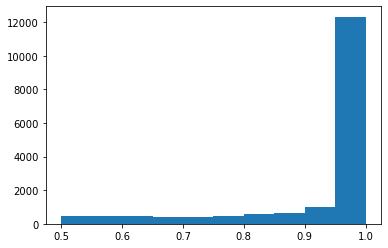

In [28]:
printCar(bonnePredV)

Nombre d'éléments : 19345
Moyenne des probas : 0.9778477054167299
Max : 1.0, Min : 0.50051033
Ecart type : 0.08218961003704903


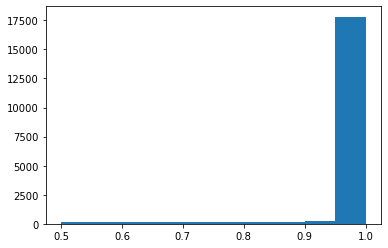

In [29]:
printCar(bonnePredP)

Nombre d'éléments : 11013
Moyenne des probas : 0.12798930147261095
Max : 0.49986875, Min : 5.612551e-09
Ecart type : 0.1617428133997507


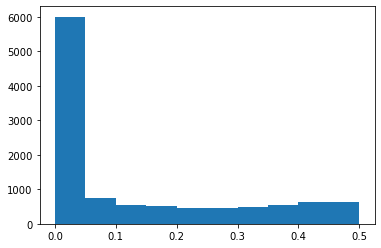

In [30]:
printCar(mauvaisePredV) #on prédit avion alors que c'est voix : histo des proba prédite pour voix par le modèle

Nombre d'éléments : 8092
Moyenne des probas : 0.06325052253587765
Max : 0.49989504, Min : 1.2625154e-06
Ecart type : 0.11926503468197626


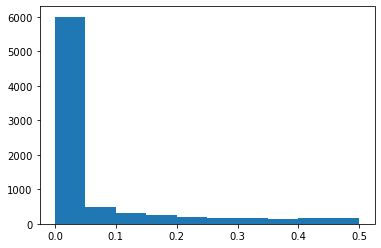

In [31]:
printCar(mauvaisePredP) #on prédit voix alors que c'est avion : histo des proba prédite pour avion par le modèle

(array([6006.,  740.,  555.,  515.,  461.,  463.,  473.,  551.,  631.,
         618.]),
 array([5.6125509e-09, 4.9986880e-02, 9.9973753e-02, 1.4996062e-01,
        1.9994751e-01, 2.4993438e-01, 2.9992124e-01, 3.4990811e-01,
        3.9989501e-01, 4.4988188e-01, 4.9986875e-01], dtype=float32),
 <BarContainer object of 10 artists>)

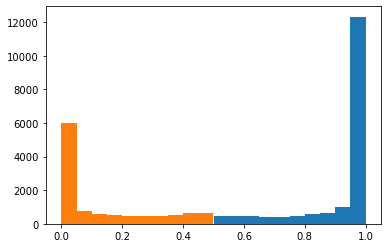

In [32]:
#Histogramme des probabilités prédites pour la voix 

plt.hist(bonnePredV)
plt.hist(mauvaisePredV)

(array([6005.,  494.,  326.,  249.,  189.,  181.,  156.,  142.,  169.,
         181.]),
 array([1.2625154e-06, 4.9990639e-02, 9.9980019e-02, 1.4996940e-01,
        1.9995877e-01, 2.4994814e-01, 2.9993752e-01, 3.4992692e-01,
        3.9991629e-01, 4.4990566e-01, 4.9989504e-01], dtype=float32),
 <BarContainer object of 10 artists>)

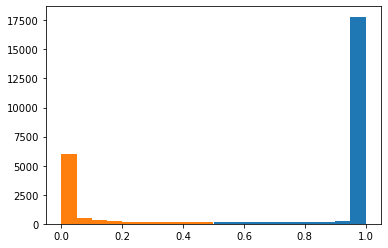

In [33]:
#Histogramme des probabilités prédites pour avion

plt.hist(bonnePredP)
plt.hist(mauvaisePredP)

In [34]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_pred_aux,y_test)
print('Accuracy is:', a*100)

Accuracy is: 65.70387390945321


In [65]:
def has_voice2(x,hop,duration_sec_threshold,error_threshold):
    ratio = np.count_nonzero(x=='Voice')/len(x)
    duration_discrete_threshold = round(duration_sec_threshold * 22050 / hop)
    binary_pred = [0 if elt=='Plane' else 1 for elt in x]
    df_x = pd.DataFrame(binary_pred)
    df_sum = df_x.rolling(duration_discrete_threshold).mean()
    x_plot = [elt*hop/22050 for elt in range(len(x))] #x en seconds
    # plt.plot(x_plot,df_sum[0])
    # plt.show()
    return len(df_sum[df_sum[0]>error_threshold])>0

In [72]:
def has_voice_vote(y,hop,duration_sec_threshold):
    duration_discrete_threshold = round(duration_sec_threshold * 22050 / hop)
    votes = []
    for i in range(len(y)-duration_discrete_threshold):
        #window = y[i:i+duration_discrete_threshold]
        vote_window = 0
        for k in range(i,i+duration_discrete_threshold):
            confiance = y[i][0]-y[i][1]
            vote_window += confiance
        votes.append(vote_window/duration_discrete_threshold)
    return votes
    
                

PARTIE MODELE

In [39]:
# pca = PCA(0.99).fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [40]:
from sklearn.metrics import accuracy_score

pred = rf.predict(X_test)
accuracy_score(pred,y_test)

0.4558223833257816

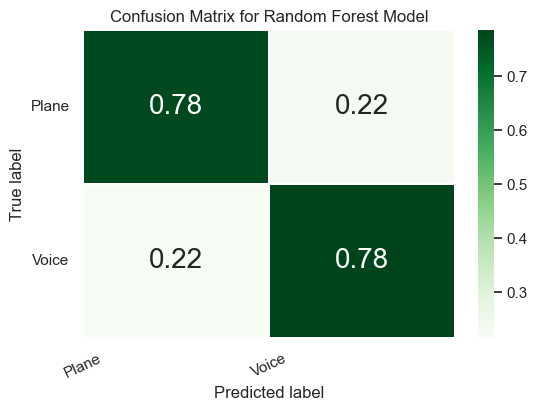

In [145]:


pred = rf.predict(X_test)
matrix = confusion_matrix(pred,y_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(6,4))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Plane','Voice']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

TEST DE LA RF SAUVEGARDEE

In [71]:
import joblib 

rf = joblib.load("random_forest.joblib")
# joblib.dump(rf, "random_forest.joblib")


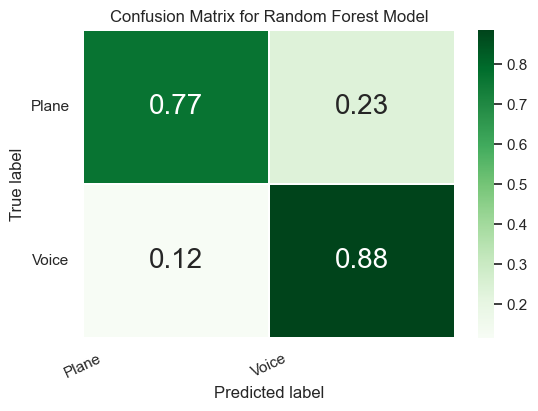

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


pred = rf.predict(X_test)
matrix = confusion_matrix(pred,y_test)
# pred = rf.predict(X_test)
# matrix = confusion_matrix(pred,y_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(6,4))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = rf.classes_
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [179]:
def has_voice(x,hop,duration_sec_threshold,error_threshold):
    ratio = np.count_nonzero(x=='Voice')/len(x)
    duration_discrete_threshold = duration_sec_threshold * 22050 / hop
    if len(x) >duration_discrete_threshold and ratio > error_threshold:
        print('Durée de la voix: ',len(x)*hop/22050,'seconds')
        return True
    elif len(x)<duration_discrete_threshold:
        return False
    else:
        half = len(x)//2
        return has_voice(x[:half],hop,duration_sec_threshold,error_threshold) or has_voice(x[half:],hop,duration_sec_threshold,error_threshold)

def has_voice2(x,hop,duration_sec_threshold,error_threshold):
    ratio = np.count_nonzero(x=='Voice')/len(x)
    duration_discrete_threshold = round(duration_sec_threshold * 22050 / hop)
    binary_pred = [0 if elt=='Plane' else 1 for elt in x]
    df_x = pd.DataFrame(binary_pred)
    df_sum = df_x.rolling(duration_discrete_threshold).mean()
    x_plot = [elt*hop/22050 for elt in range(len(x))] #x en seconds
    # plt.plot(x_plot,df_sum[0])
    # plt.show()
    return len(df_sum[df_sum[0]>error_threshold])>0

def gen_valid_test(db_folder_path,n_records):

    l_records = os.listdir(db_folder_path)
    sub_l_records = rd.sample(l_records,n_records)
    sample = rd.sample(sub_l_records,n_records)
    sp_valid = []
    hops_valid = []
    for i in range(n_records):
        print('Building validation set {}/{}'.format(i,n_records),end='\r')
        signal,sample_rate = librosa.load(db_folder_path + sample[i])
        spectrum = librosa.stft(y=signal,center=False) 
        spectrum = spectrum.astype(float)
        # fig = librosa.display.specshow(spectrum, sr=sample_rate, x_axis='time', y_axis='log')
        # plt.colorbar(format='%+2.0f dB')
        # plt.title('Spectrogram')
        # plt.plot()
        # plt.show()
        good_shape_spectrum = np.abs(np.transpose(spectrum))
        sp_valid.append(good_shape_spectrum)
        hops_valid.append(len(signal)//len(good_shape_spectrum))

    return sp_valid,hops_valid

def valid_model(model,duration_threshold,error_threshold,n_records):
    plane_valid,hops_plane = gen_valid_test(path_to_db_plane,n_records)
    both_valid,hops_both = gen_valid_test(path_to_db_both,n_records)

    target_plane = [False for elt in plane_valid]
    target_both = [True for elt in both_valid]
    
    records_valid = plane_valid + both_valid
    target_valid =  target_plane + target_both
    hops_valid = hops_plane + hops_both

    # records_valid = both_valid
    # target_valid =  target_both
    # hops_valid = hops_both

    # records_valid = plane_valid
    # target_valid =  target_plane
    # hops_valid = hops_plane

    # print(hops_valid)

    prediction_for_records = []
    for i  in range(len(records_valid)):
        pred = model.predict(records_valid[i])
        prediction_for_records.append(has_voice2(pred,hops_valid[i],duration_threshold,error_threshold))

    return accuracy_score(target_valid,prediction_for_records)

In [ ]:
valid_model(rf,2,0.63,4)

In [185]:
def hyper_tune_valid(model,n_records,n_iter):
    
    dur_range = np.linspace(1,5,6)
    thresh_range = np.linspace(0.5,1,20)

    best_dur,best_thresh,best_valid = 0,0,0

    for i in range(n_iter):
        
        if best_valid ==1:
            return best_dur,best_thresh,best_valid

        dur = rd.choice(dur_range)
        thresh = rd.choice(thresh_range)
        val = valid_model(model,dur,thresh,n_records)

        if val > best_valid:
            best_valid = val
            best_dur = dur
            best_thresh = thresh

    return best_dur,best_thresh,best_valid



In [186]:
hyper_tune_valid(rf,10,70)

(1.8, 0.7894736842105263, 0.95)